In [2]:
import pathlib
import pathlib
import pandas as pd
import matplotlib.pyplot as plt


freq_data_dir = ".\\2018"
naive_dir = ".\\naive"
_50k_freq_data_filepath = pathlib.Path(freq_data_dir) / 'en_50k.txt'
all_freq_data_filepath = pathlib.Path(freq_data_dir) / 'en_all.txt'
ignored_words_filepath = pathlib.Path(freq_data_dir) / 'en_ignored.txt'


In [3]:
df = pd.read_csv(_50k_freq_data_filepath, sep=' ', header=None, names=['word', 'freq'])
# make a new column with the length of the word
df['length'] = df['word'].str.len()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   word    49998 non-null  object 
 1   freq    50000 non-null  int64  
 2   length  49998 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [4]:
df.head()

,word,freq,length
0,you,28787591,3.0
1,i,27086011,1.0
2,the,22761659,3.0
3,to,17099834,2.0
4,a,14484562,1.0


In [8]:
long_words = df[df['length'] >= 20]['word'].tolist()
print(long_words)


['great-great-grandfather', 'un-fucking-believable', 'obsessive-compulsive']


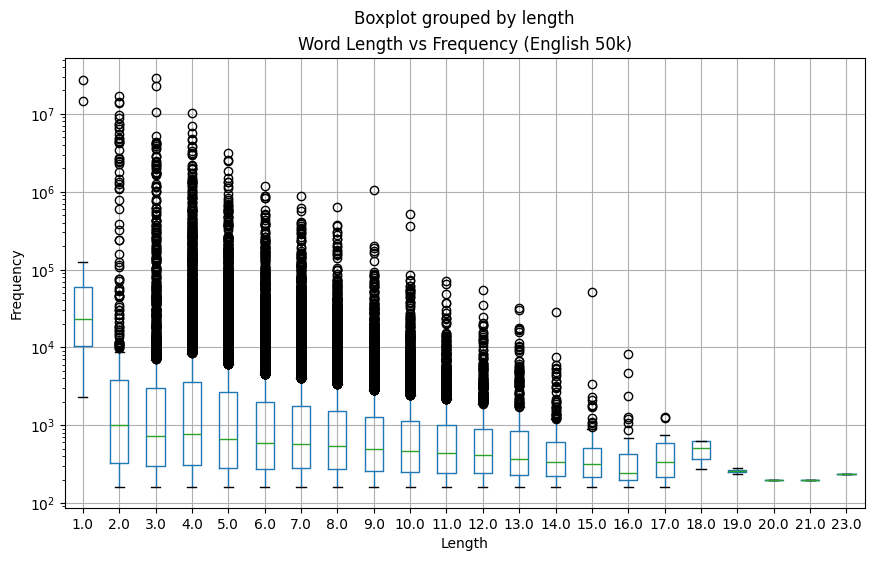

In [21]:
df.boxplot(column='freq', by='length', figsize=(10,6))
plt.yscale('log')
plt.title('Word Length vs Frequency (English 50k)')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.show()


In [6]:
# create an empty dataframe to store the outliers
outliers_df = pd.DataFrame(columns=['word', 'freq', 'length'])

# loop through each word length
for length in df['length'].unique():
    # get the subset of the dataframe for the current word length
    subset = df[df['length'] == length]
    
    # calculate the IQR of frequency for the current word length
    q1 = subset['freq'].quantile(0.25)
    q3 = subset['freq'].quantile(0.75)
    iqr = q3 - q1
    
    # calculate the upper and lower bounds for outliers
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    # get the outliers for the current word length
    outliers = subset[(subset['freq'] < lower_bound) | (subset['freq'] > upper_bound)]
    
    # add the outliers to the outliers dataframe
    outliers_df = pd.concat([outliers_df, outliers], axis=0)


#sort the outliers by word length than frequency descending
# sort the outliers by word length ascending and the frequency descending
outliers_df.sort_values(by=['length', 'freq'], ascending=[True, False], inplace=True)

outliers_df.head(30)



C:\Users\mjdie\AppData\Local\Temp\ipykernel_15376\2491242568.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers_df = pd.concat([outliers_df, outliers], axis=0)


,word,freq,length
1,i,27086011,1.0
4,a,14484562,1.0
3,to,17099834,2.0
5,'s,14291013,2.0
6,it,13631703,2.0
9,'t,9628970,2.0
10,of,8915110,2.0
11,is,7400675,2.0
12,in,7337058,2.0
14,we,6755687,2.0


In [7]:
# group the outliers by word length and count the number of outliers for each group
outliers_count = outliers_df.groupby('length').size()

outliers_count.head(25)
# plot the scatter plot
#outliers_count.plot(kind='scatter', x='length', y='count', figsize=(10,6))
#plt.title('Number of Outliers vs Word Length (English 50k)')
#lt.xlabel('Word Length')
#plt.ylabel('Number of Outliers')

#plt.show()


length
1.0        2
2.0       78
3.0      335
4.0      774
5.0     1072
6.0     1253
7.0     1143
8.0      912
9.0      637
10.0     438
11.0     254
12.0     133
13.0      69
14.0      36
15.0      12
16.0       7
17.0       2
dtype: int64

In [34]:
# loop through each word length
for length in outliers_df['length'].unique():
    # get the subset of the dataframe for the current word length
    subset = outliers_df[outliers_df['length'] == length]
    
    # create the filename for the current word length
    filename = f"{int(length):2d}_letter_words.txt"
    
    # save the subset to a text file
    subset.to_csv(pathlib.Path('outliers') / filename, sep=' ', header=False, index=False)
    


In [64]:
import collections
import pathlib

# load the list of English words
words_filepath = pathlib.Path('2018') / 'en_full.txt'
with open(words_filepath, 'r', encoding='utf-8') as f:
    words = f.read().splitlines()

# define the suffix length to consider
max_suffix_length = 5

# create a Counter object to count the frequency of each suffix
suffix_counter = collections.Counter()

# loop through each word in the list
for word in words:

    word_with_freq = word

    freq = int(word_with_freq.split(' ')[1])
    
    #remove spaces and numbers
    word = word.replace(' ', '')
    word = word.replace('1', '')
    word = word.replace('2', '')
    word = word.replace('3', '')
    word = word.replace('4', '')
    word = word.replace('5', '')
    word = word.replace('6', '')
    word = word.replace('7', '')
    word = word.replace('8', '')
    word = word.replace('9', '')
    Word = word.replace('0', '')
    
    # loop through each suffix length
    for suffix_length in range(1, max_suffix_length + 1):
        
        # skip the word if it's shorter than the current suffix length
        if len(word) < suffix_length:
            continue
        
        # get the suffix of the current word
        suffix = word[-suffix_length:]
        
        # increment the count for the current suffix
        suffix_counter[suffix] += freq


In [65]:
# get the 1 million most common suffixes that are at least 2 characters long
most_common_suffixes = suffix_counter.most_common(1000000)

# print to a file all the most common suffixes that are all alphabetic and at least 2 characters long
with open(pathlib.Path(naive_dir) / 'naive_suffixes.txt', 'w', encoding='utf-8') as f:
    for suffix, count in most_common_suffixes:
        if suffix.isalpha() and len(suffix) >= 2:
            f.write(f"{suffix} {count}\n")


In [62]:
import collections
import pathlib

# load the list of English words
words_filepath = pathlib.Path('2018') / 'en_full.txt'
with open(words_filepath, 'r', encoding='utf-8') as f:
    words = f.read().splitlines()

# define the prefix length to consider
max_prefix_length = 5

# create a Counter object to count the frequency of each prefix
prefix_counter = collections.Counter()

# loop through each word in the list
for word in words:

    word_with_freq = word

    freq = int(word_with_freq.split(' ')[1])

    #remove spaces and numbers
    word = word.replace(' ', '')
    word = word.replace('1', '')
    word = word.replace('2', '')
    word = word.replace('3', '')
    word = word.replace('4', '')
    word = word.replace('5', '')
    word = word.replace('6', '')
    word = word.replace('7', '')
    word = word.replace('8', '')
    word = word.replace('9', '')
    Word = word.replace('0', '')
    
    # loop through each prefix length
    for prefix_length in range(1, max_prefix_length + 1):
        
        # skip the word if it's shorter than the current prefix length
        if len(word) < prefix_length:
            continue
        
        # get the prefix of the current word
        prefix = word[:prefix_length]
        
        # increment the count for the current prefix
        prefix_counter[prefix] += freq

In [63]:
# get the 1 million most common prefixes that are at least 2 characters long
most_common_prefixes = prefix_counter.most_common(1000000)

# print to a file all the most common suffixes that are all alphabetic and at least 2 characters long
with open(pathlib.Path(naive_dir) / 'naive_prefixes.txt', 'w', encoding='utf-8') as f:
    for prefix, count in most_common_prefixes:
        if prefix.isalpha() and len(prefix) >= 2:
            f.write(f"{prefix} {count}\n")

In [72]:
import pandas as pd

# read the prefixes.txt file into a dataframe
prefixes_df = pd.read_csv('prefixes.txt', sep=' ', header=None, names=['prefix', 'count'])

# sort the dataframe by the starting letter of the prefix
prefixes_df['starting_letter'] = prefixes_df['prefix'].str[0]
prefixes_df.sort_values(by='starting_letter', inplace=True)

# display the sorted dataframe
print(prefixes_df)


       prefix  count starting_letter
192612  abdis      5               a
381431   antο      1               a
273570  ayats      2               a
19720   abode   1053               a
260845  akaan      2               a
...       ...    ...             ...
420123    ｻri      1               ｻ
420124   ｻrin      1               ｻ
420125  ｻring      1               ｻ
3008      NaN  46156             NaN
18231     NaN   1264             NaN

[442533 rows x 3 columns]


In [73]:
prefixes_df['starting_letter'].unique()

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
       'ª', 'µ', 'º', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è',
       'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ',
       'ö', 'ø', 'ù', 'ú', 'û', 'ü', 'ý', 'þ', 'ÿ', 'ā', 'ă', 'ć', 'č',
       'đ', 'ē', 'ė', 'ī', 'İ', 'ı', 'ķ', 'ĺ', 'ł', 'ō', 'ő', 'œ', 'ř',
       'ś', 'ş', 'š', 'ţ', 'ū', 'ů', 'ź', 'ż', 'ž', 'ƒ', 'ơ', 'ǻ', 'ș',
       'ț', 'ˊ', 'α', 'β', 'δ', 'ε', 'η', 'ι', 'κ', 'μ', 'ν', 'ξ', 'ο',
       'π', 'σ', 'τ', 'υ', 'ψ', 'ώ', 'а', 'в', 'е', 'й', 'к', 'м', 'н',
       'о', 'п', 'р', 'с', 'т', 'у', 'ц', 'э', 'я', 'ё', 'ѕ', 'ї', 'ћ',
       'ḍ', 'ḷ', 'ṭ', 'た', 'ど', 'ふ', 'も', 'ㄲ', '一', '今', '何', '君', '天',
       '强', '思', '报', '无', '星', '春', '最', '朢', '杋', '杍', '江', '畤', '神',
       '第', '缺', '脛', '莽', '蓈', '西', '踴', '这', '金', '鈥', '鈾', '难', 'ﬁ',
       'ﬂ', 'ｔ', 'ｗ', 'ｻ', nan], dtype=object)

In [75]:
# read the prefixes.txt file into a dataframe
a10_prefixes = prefixes_df[(prefixes_df['starting_letter'] == 'a') & (prefixes_df['count'] > 10)]

# sort the dataframe by thee count of the prefix
a10_prefixes.sort_values(by='count', ascending=False, inplace=True)

# print the filtered dataframe
print(a10_prefixes)


       prefix     count starting_letter
6          an  15603018               a
17        and  10684458               a
37         al   6168410               a
39         ar   5827188               a
60        are   4468082               a
...       ...       ...             ...
136064   ateþ        11               a
140475   alog        11               a
138814   aatm        11               a
140498  afect        11               a
139637     aî        11               a

[8872 rows x 3 columns]


C:\Users\mjdie\AppData\Local\Temp\ipykernel_12872\491933319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a10_prefixes.sort_values(by='count', ascending=False, inplace=True)


In [76]:
# print all two letter prefixes that occur more than 10 times
for prefix in a10_prefixes['prefix']:
    if len(prefix) == 2:
        print(prefix)

an
al
ar
as
ab
at
ag
am
ac
af
aw
ap
ad
ah
ai
au
av
aa
ay
ak
ae
ax
az
aj
aq
ao
aé
añ
aï
aý
ağ
aœ
aş
aç
aí
aﬂ
að
aú
aþ
aã
aâ
aî
